In [20]:
import pandas as pd 

data_just_pill = pd.read_csv("/workspace/nabang1010/LBA_VAIPE/GNN/Multi_Label_Image_Recognition_with_Graph_Convolutional_Networks/data/public_train/data_GNN_XA_concat_mapping.csv")
data_just_pill.head()

,pres_file_name,diagnose_concat,drugname_concat_TrOCR,usage_concat,quantity_concat,list_mapping
0,VAIPE_P_TRAIN_0,Chấn đoán: T10 - Tăng huyết áp vô căn (nguyên ...,"['1 ) RENAPRIL 5MG 5MG2) NOVOXIM-500 0,5G3 ) H...",Sáng 1 Viên Tối 2 Viên Sáng 2 Viên,SL: 28 Viên SL: 20 Viên SL: 20 Viên,"[47, 10, 64, 107]"
1,VAIPE_P_TRAIN_1,Chấn đoán: E11 - Bệnh đái tháo đường không phụ...,"[""1) GLUCOFAST 850 850MG2) DIAMICRON MR TAB 30...",Chiều 1 Viên Sáng 1 Viên Sáng 1 Viên Sáng 1 Viên,SL: 60 Viên SL: 30 Viên SL: 30 Viên,"[55, 37, 46, 107]"
2,VAIPE_P_TRAIN_10,Chẩn đoán: E11 - Bệnh đái tháo đường không phụ...,['1 ) MEGLUCON 1000 1000 MG'],Sáng 1 Viên,SL: 61 Viên,"[56, 107]"
3,VAIPE_P_TRAIN_100,Chấn đoán: [10 - Tăng huyết áp vô căn (nguyên ...,['1 ) TROYSAR AM 5MG +50MG2) LENINARTO 10 10MG...,Sáng 1 Viên Tối 1 Viên Chiều 1 Viên Sáng 1 Viên,SL: 30 Viên SL: 30 Viên SL: 20 Viên,"[1, 14, 92, 107]"
4,VAIPE_P_TRAIN_1000,Chẩn đoán: K12.3 - Viêm miệng (loét),"['1 ) CEFADROXIL 500MG 0,5G2) PARTAMOL TAB. 50...",Chiều 2 Viên Sáng 2 Viên Chiều 2 Viên Sáng 2 V...,SL: 28 Viên SL: 20 Viên,"[43, 91, 107]"


# diagnose_concat	

In [21]:
import torch
# use PhoBERT to get embedding for each drugname
from transformers import AutoTokenizer, AutoModel
from tqdm import tqdm

tokenizer_phobert = AutoTokenizer.from_pretrained("vinai/phobert-base")
model_phobert = AutoModel.from_pretrained("vinai/phobert-base")




Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Some weights of the model checkpoint at vinai/phobert-base were not used when initializing RobertaModel: ['lm_head.layer_norm.weight', 'lm_head.bias', 'lm_head.decoder.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.bias', 'lm_head.decoder.bias', 'lm_head.dense.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [22]:
diagnose_embedding = []
for diagnose in tqdm(data_just_pill["diagnose_concat"]):
    input_ids = torch.tensor(tokenizer_phobert.encode(diagnose, add_special_tokens=True)).unsqueeze(0)  # Batch size 1
    outputs = model_phobert(input_ids)  
    last_hidden_states = outputs[0]  # The last hidden-state is the first element of the output tuple
    diagnose_embedding.append(last_hidden_states[0][0].detach().numpy().tolist())


100%|██████████| 1173/1173 [00:46<00:00, 25.04it/s]


In [23]:
data_just_pill["diagnose_embedding"] = diagnose_embedding

In [24]:
data_just_pill.head()

,pres_file_name,diagnose_concat,drugname_concat_TrOCR,usage_concat,quantity_concat,list_mapping,diagnose_embedding
0,VAIPE_P_TRAIN_0,Chấn đoán: T10 - Tăng huyết áp vô căn (nguyên ...,"['1 ) RENAPRIL 5MG 5MG2) NOVOXIM-500 0,5G3 ) H...",Sáng 1 Viên Tối 2 Viên Sáng 2 Viên,SL: 28 Viên SL: 20 Viên SL: 20 Viên,"[47, 10, 64, 107]","[-0.37636616826057434, 0.010718670673668385, -..."
1,VAIPE_P_TRAIN_1,Chấn đoán: E11 - Bệnh đái tháo đường không phụ...,"[""1) GLUCOFAST 850 850MG2) DIAMICRON MR TAB 30...",Chiều 1 Viên Sáng 1 Viên Sáng 1 Viên Sáng 1 Viên,SL: 60 Viên SL: 30 Viên SL: 30 Viên,"[55, 37, 46, 107]","[-0.248085156083107, 0.3721701502799988, -0.49..."
2,VAIPE_P_TRAIN_10,Chẩn đoán: E11 - Bệnh đái tháo đường không phụ...,['1 ) MEGLUCON 1000 1000 MG'],Sáng 1 Viên,SL: 61 Viên,"[56, 107]","[-0.397485613822937, 0.2730478048324585, -0.83..."
3,VAIPE_P_TRAIN_100,Chấn đoán: [10 - Tăng huyết áp vô căn (nguyên ...,['1 ) TROYSAR AM 5MG +50MG2) LENINARTO 10 10MG...,Sáng 1 Viên Tối 1 Viên Chiều 1 Viên Sáng 1 Viên,SL: 30 Viên SL: 30 Viên SL: 20 Viên,"[1, 14, 92, 107]","[-0.22476842999458313, -0.08377768844366074, -..."
4,VAIPE_P_TRAIN_1000,Chẩn đoán: K12.3 - Viêm miệng (loét),"['1 ) CEFADROXIL 500MG 0,5G2) PARTAMOL TAB. 50...",Chiều 2 Viên Sáng 2 Viên Chiều 2 Viên Sáng 2 V...,SL: 28 Viên SL: 20 Viên,"[43, 91, 107]","[-0.0748608335852623, 0.2824253737926483, -0.6..."


# drugname concat

In [25]:
# embedding by bert multilingual
from transformers import BertTokenizer, BertModel

tokenizer_bert_multilingual = BertTokenizer.from_pretrained('bert-base-multilingual-cased')
model_bert_multilingual = BertModel.from_pretrained('bert-base-multilingual-cased')



Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [26]:
drugname_embedding = []
for drugname in tqdm(data_just_pill["drugname_concat_TrOCR"]):
    input_ids = torch.tensor(tokenizer_bert_multilingual.encode(drugname, add_special_tokens=True)).unsqueeze(0)  # Batch size 1
    outputs = model_bert_multilingual(input_ids)  
    last_hidden_states = outputs[0]  # The last hidden-state is the first element of the output tuple
    drugname_embedding.append(last_hidden_states[0][0].detach().numpy().tolist())


100%|██████████| 1173/1173 [00:51<00:00, 22.68it/s]


In [27]:
data_just_pill["drugname_embedding"] = drugname_embedding

In [28]:
data_just_pill.head()

,pres_file_name,diagnose_concat,drugname_concat_TrOCR,usage_concat,quantity_concat,list_mapping,diagnose_embedding,drugname_embedding
0,VAIPE_P_TRAIN_0,Chấn đoán: T10 - Tăng huyết áp vô căn (nguyên ...,"['1 ) RENAPRIL 5MG 5MG2) NOVOXIM-500 0,5G3 ) H...",Sáng 1 Viên Tối 2 Viên Sáng 2 Viên,SL: 28 Viên SL: 20 Viên SL: 20 Viên,"[47, 10, 64, 107]","[-0.37636616826057434, 0.010718670673668385, -...","[0.11103437095880508, -0.17049823701381683, -0..."
1,VAIPE_P_TRAIN_1,Chấn đoán: E11 - Bệnh đái tháo đường không phụ...,"[""1) GLUCOFAST 850 850MG2) DIAMICRON MR TAB 30...",Chiều 1 Viên Sáng 1 Viên Sáng 1 Viên Sáng 1 Viên,SL: 60 Viên SL: 30 Viên SL: 30 Viên,"[55, 37, 46, 107]","[-0.248085156083107, 0.3721701502799988, -0.49...","[-0.060159288346767426, -0.0621950589120388, -..."
2,VAIPE_P_TRAIN_10,Chẩn đoán: E11 - Bệnh đái tháo đường không phụ...,['1 ) MEGLUCON 1000 1000 MG'],Sáng 1 Viên,SL: 61 Viên,"[56, 107]","[-0.397485613822937, 0.2730478048324585, -0.83...","[0.13622930645942688, 0.08149611949920654, 0.0..."
3,VAIPE_P_TRAIN_100,Chấn đoán: [10 - Tăng huyết áp vô căn (nguyên ...,['1 ) TROYSAR AM 5MG +50MG2) LENINARTO 10 10MG...,Sáng 1 Viên Tối 1 Viên Chiều 1 Viên Sáng 1 Viên,SL: 30 Viên SL: 30 Viên SL: 20 Viên,"[1, 14, 92, 107]","[-0.22476842999458313, -0.08377768844366074, -...","[-0.017341794446110725, -0.15663300454616547, ..."
4,VAIPE_P_TRAIN_1000,Chẩn đoán: K12.3 - Viêm miệng (loét),"['1 ) CEFADROXIL 500MG 0,5G2) PARTAMOL TAB. 50...",Chiều 2 Viên Sáng 2 Viên Chiều 2 Viên Sáng 2 V...,SL: 28 Viên SL: 20 Viên,"[43, 91, 107]","[-0.0748608335852623, 0.2824253737926483, -0.6...","[0.1533374786376953, 0.015878086909651756, -0...."


# quantity_concat	

In [29]:
# process quantity
import re
def keep_number_and_space(string):
    return re.sub("[^0-9 ]", "", string)

def string_number_to_list(string):
    string = " ".join(string.split())
    string = string.split(" ")
    return [int(i) for i in string]

def padding_short_number_list(number_list, max_length=5):
    if len(number_list) < max_length: 
        number_list += [0] * (max_length - len(number_list))
    return number_list


def process_quantity(quantity):
    quantity = keep_number_and_space(quantity)
    quantity = string_number_to_list(quantity)
    quantity = padding_short_number_list(quantity)
    return quantity



In [44]:
quantity_list = []
import numpy as np
for quantity_line in data_just_pill["quantity_concat"]:
    quantity_embed  = process_quantity(quantity_line)
    quantity_embed = np.array(quantity_embed)
    quantity_list.append(quantity_embed.tolist())

data_just_pill["quantity_embedding"] = quantity_list

In [45]:
data_just_pill.head()

,pres_file_name,diagnose_concat,drugname_concat_TrOCR,usage_concat,quantity_concat,list_mapping,diagnose_embedding,drugname_embedding,quantity_embedding
0,VAIPE_P_TRAIN_0,Chấn đoán: T10 - Tăng huyết áp vô căn (nguyên ...,"['1 ) RENAPRIL 5MG 5MG2) NOVOXIM-500 0,5G3 ) H...",Sáng 1 Viên Tối 2 Viên Sáng 2 Viên,SL: 28 Viên SL: 20 Viên SL: 20 Viên,"[47, 10, 64, 107]","[-0.37636616826057434, 0.010718670673668385, -...","[0.11103437095880508, -0.17049823701381683, -0...","[28, 20, 20, 0, 0]"
1,VAIPE_P_TRAIN_1,Chấn đoán: E11 - Bệnh đái tháo đường không phụ...,"[""1) GLUCOFAST 850 850MG2) DIAMICRON MR TAB 30...",Chiều 1 Viên Sáng 1 Viên Sáng 1 Viên Sáng 1 Viên,SL: 60 Viên SL: 30 Viên SL: 30 Viên,"[55, 37, 46, 107]","[-0.248085156083107, 0.3721701502799988, -0.49...","[-0.060159288346767426, -0.0621950589120388, -...","[60, 30, 30, 0, 0]"
2,VAIPE_P_TRAIN_10,Chẩn đoán: E11 - Bệnh đái tháo đường không phụ...,['1 ) MEGLUCON 1000 1000 MG'],Sáng 1 Viên,SL: 61 Viên,"[56, 107]","[-0.397485613822937, 0.2730478048324585, -0.83...","[0.13622930645942688, 0.08149611949920654, 0.0...","[61, 0, 0, 0, 0]"
3,VAIPE_P_TRAIN_100,Chấn đoán: [10 - Tăng huyết áp vô căn (nguyên ...,['1 ) TROYSAR AM 5MG +50MG2) LENINARTO 10 10MG...,Sáng 1 Viên Tối 1 Viên Chiều 1 Viên Sáng 1 Viên,SL: 30 Viên SL: 30 Viên SL: 20 Viên,"[1, 14, 92, 107]","[-0.22476842999458313, -0.08377768844366074, -...","[-0.017341794446110725, -0.15663300454616547, ...","[30, 30, 20, 0, 0]"
4,VAIPE_P_TRAIN_1000,Chẩn đoán: K12.3 - Viêm miệng (loét),"['1 ) CEFADROXIL 500MG 0,5G2) PARTAMOL TAB. 50...",Chiều 2 Viên Sáng 2 Viên Chiều 2 Viên Sáng 2 V...,SL: 28 Viên SL: 20 Viên,"[43, 91, 107]","[-0.0748608335852623, 0.2824253737926483, -0.6...","[0.1533374786376953, 0.015878086909651756, -0....","[28, 20, 0, 0, 0]"


In [46]:
# save data  csv 
data_just_pill.to_csv("/workspace/nabang1010/LBA_VAIPE/GNN/Multi_Label_Image_Recognition_with_Graph_Convolutional_Networks/data/public_train/data_XA_embed_list.csv", index=False) 


In [47]:
import pandas as pd
data_full = pd.read_csv("/workspace/nabang1010/LBA_VAIPE/GNN/Multi_Label_Image_Recognition_with_Graph_Convolutional_Networks/data/public_train/data_XA_full.csv")
data_emb = pd.read_csv("/workspace/nabang1010/LBA_VAIPE/GNN/Multi_Label_Image_Recognition_with_Graph_Convolutional_Networks/data/public_train/data_XA_embed_list.csv")

In [48]:
import torch
def check(idx):


drugname_embedding, diagnose_embedding, quantity_embedding = check(2)
print(drugname_embedding.shape)
print(diagnose_embedding.shape)
print(quantity_embedding.shape)

torch.Size([768])
torch.Size([768])
torch.Size([5])


In [11]:
import pandas as pd
path = "/workspace/nabang1010/LBA_VAIPE/GNN/Multi_Label_Image_Recognition_with_Graph_Convolutional_Networks/data/pill_classify/thuoc_thay_the.csv"
df = pd.read_csv(path, delimiter  = "|", header= None)

In [13]:
df.head()

# add column name [["drug_id", "drug_same"]]
df.columns = ["drug_id", "drug_same"]

In [16]:
# df.to_csv("/workspace/nabang1010/LBA_VAIPE/GNN/Multi_Label_Image_Recognition_with_Graph_Convolutional_Networks/data/pill_classify/thuoc_thay_the.csv")
df = pd.read_csv("/workspace/nabang1010/LBA_VAIPE/GNN/Multi_Label_Image_Recognition_with_Graph_Convolutional_Networks/data/pill_classify/thuoc_thay_the.csv")

In [17]:
id_list = ['1' ,'2', '3']


In [40]:
id_list = [int(i) for i in id_list]
same_all_list = []
if 107 in id_list:
    # remove 107
    id_list.remove(107)

for id in id_list:
    print(id)
    same_id_series =  df[df["drug_id"] == id]["drug_same"]
    if len(same_id_series) > 0:
        same_id_list = eval(same_id_series.values[0])
        same_all_list += same_id_list
same_all_list


1
2
3


[0, 1, 99, 101, 88, 89, 90, 91, 60, 2, 21]

In [36]:
ok = df[df["drug_id"] == 3]["drug_same"]
ok


Series([], Name: drug_same, dtype: object)

In [54]:
import random 
p = random.random()
p

0.7431870167378287

In [61]:
path = "/workspace/nabang1010/LBA_VAIPE/GNN/Multi_Label_Image_Recognition_with_Graph_Convolutional_Networks/data/pill_classify/data_classification_fixed_aug"
import os
folder_list =  os.listdir(path)
folder_list = [int(i) for i in folder_list]
folder_list

[43,
 90,
 5,
 67,
 10,
 6,
 18,
 49,
 83,
 12,
 37,
 19,
 32,
 97,
 52,
 73,
 27,
 40,
 96,
 86,
 31,
 58,
 91,
 65,
 16,
 57,
 50,
 42,
 103,
 69,
 95,
 8,
 0,
 79,
 41,
 39,
 3,
 47,
 92,
 106,
 55,
 99,
 105,
 20,
 59,
 61,
 89,
 15,
 60,
 84,
 74,
 38,
 4,
 53,
 33,
 13,
 63,
 45,
 30,
 54,
 93,
 77,
 87,
 46,
 71,
 56,
 14,
 22,
 34,
 66,
 44,
 29,
 2,
 78,
 72,
 23,
 35,
 64,
 102,
 94,
 68,
 62,
 101,
 36,
 26,
 76,
 81,
 21,
 104,
 25,
 82,
 48,
 85,
 17,
 70,
 7,
 9,
 80,
 24,
 88,
 11,
 51,
 100,
 75,
 1,
 98,
 28]

In [62]:
# list 0 to 107 
import numpy as np
id_list = np.arange(0, 108, 1)
id_list = [int(i) for i in id_list]
id_list


[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107]

In [63]:
# check id not in in_list 
for id in id_list:
    if id not in folder_list:
        print(id)

107


In [10]:
path = "/workspace/nabang1010/LBA_VAIPE/GNN/Multi_Label_Image_Recognition_with_Graph_Convolutional_Networks/data/pill_classify/data_classification_fixed_aug"

#count image in each folder
import os
folder_list =  os.listdir(path)
folder_list = [int(i) for i in folder_list]
folder_list.sort()
count_image_list = []
for folder in folder_list:
    path_folder = os.path.join(path, str(folder))
    image_len = len(os.listdir(path_folder))
    if image_len == 500:
        image_len = 1000
    count_image_list.append(image_len)


In [11]:
! pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 285.1/285.1 kB 2.1 MB/s eta 0:00:00a 0:00:01


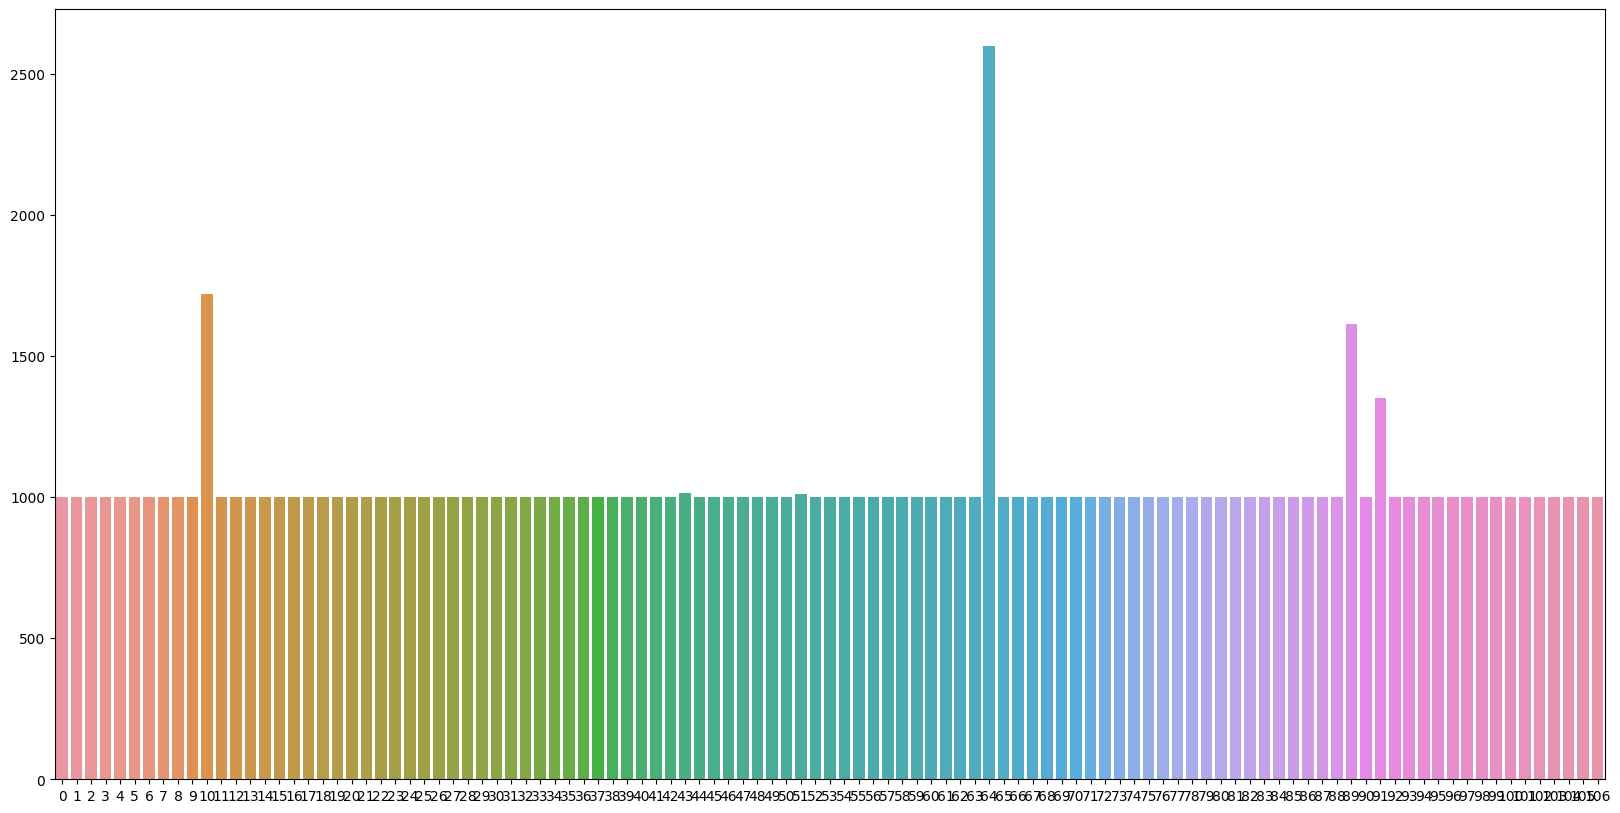

In [12]:
import seaborn
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
seaborn.barplot(x=folder_list, y=count_image_list)
plt.show()